In [46]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [4]:
#Load all the 3 dataset required for recommendation system
#Load Books Data
books = pd.read_csv('Book Recommendation/BX_Books.csv', sep=';', encoding='latin-1')
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearofPublication', 'publisher', 'imageURLS', 'imageURLM', 'imageURLL']

#Load Users Data
users = pd.read_csv('Book Recommendation/BX-Users.csv', sep=';', encoding='latin-1')
users.columns = ['userID','Location','Age']

#Load the ratings Data
ratings = pd.read_csv('Book Recommendation/BX-Book-Ratings.csv', sep=';', encoding='latin-1')
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [5]:
books.head()

,ISBN,bookTitle,bookAuthor,yearofPublication,publisher,imageURLS,imageURLM,imageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
#Check the shape of all the files,
print(ratings.shape)
print(users.shape)
print(books.shape)

(1149780, 3)
(278858, 3)
(271379, 8)


In [9]:
#Check the shape of all the files,
print(ratings.userID.nunique())
print(users.userID.nunique())
print(books.bookTitle.nunique())

105283
278858
242154


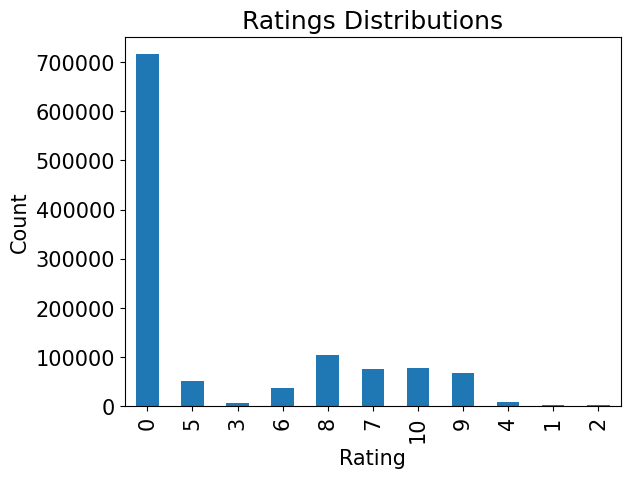

In [11]:
#Ratings Distribution Plot
plt.rc('font', size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title("Ratings Distributions")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('Ratings_Distributions.png', bbox_inches='tight')
plt.show()

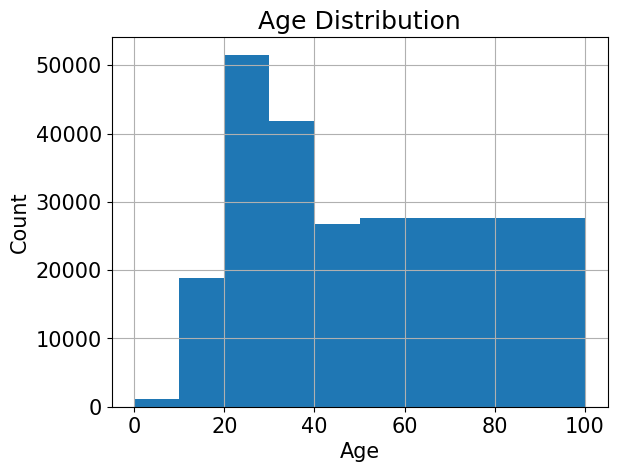

In [12]:
#Distribution plot for Users
users.Age.hist(bins=[0,10, 20, 30, 40, 50, 100])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [13]:
#To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

count1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(count1[count1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [14]:
ratings.columns

Index(['userID', 'ISBN', 'bookRating'], dtype='object')

In [15]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearofPublication', 'publisher',
       'imageURLS', 'imageURLM', 'imageURLL'],
      dtype='object')

In [16]:
#Collaborative filtering using KNN algorithm
combine_book_ratings = pd.merge(ratings, books, on='ISBN')
cols = ['yearofPublication', 'publisher', 'bookAuthor', 'imageURLS', 'imageURLM', 'imageURLL']
combine_book_ratings = combine_book_ratings.drop(cols, axis=1)
combine_book_ratings.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [17]:
combine_book_ratings.isnull().sum()

userID        0
ISBN          0
bookRating    0
bookTitle     0
dtype: int64

In [19]:
#Group by book titles and count, total ratings
book_ratingCount = (combine_book_ratings.groupby(by=['bookTitle'])['bookRating'].count().reset_index().rename(columns=
                        {'bookRating':'totalRatingCount'})[['bookTitle', 'totalRatingCount']])

In [20]:
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [21]:
combine_book_ratings.columns

Index(['userID', 'ISBN', 'bookRating', 'bookTitle'], dtype='object')

In [22]:
book_ratingCount.columns

Index(['bookTitle', 'totalRatingCount'], dtype='object')

In [23]:
#Combine the rating data with the total rating count data
#It will give us books which are popular and filter out lesser known books

ratings_with_totalRatingCount = combine_book_ratings.merge(book_ratingCount, on='bookTitle', how='left')
ratings_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [25]:
#Print statistics about the book rating counts
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160587.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [28]:
#The median book has rated 1, lets explore the top of the distributions
print(book_ratingCount['totalRatingCount'].quantile(np.arange(0.9, 1, 0.01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [29]:
#Find popular books
popularity_threshold = 50
rating_popular_books = ratings_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_books.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [30]:
rating_popular_books.shape

(62149, 5)

In [32]:
#Merging Rating df with user df
combined = rating_popular_books.merge(users, on='userID', how='left')

In [33]:
combined.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa",48.000
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa",29.000
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82,"n/a, n/a, n/a",NaN
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa",18.000
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa",32.000


In [34]:
combined = combined.drop('Age', axis=1)

In [36]:
#Drop duplicates & Create pivo table
user_rating = combined.drop_duplicates(['userID', 'bookTitle'])
user_rating_pivot = user_rating.pivot(index='bookTitle',columns='userID', values='bookRating').fillna(0)

In [37]:
user_rating_pivot.head()

userID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4 Blondes,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
84 Charing Cross Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000,0.000


In [40]:
#Create CSR Matrix
user_rating_matrix = csr_matrix(user_rating_pivot.values)

In [41]:
user_rating_matrix

<746x894 sparse matrix of type '<class 'numpy.float64'>'
	with 15040 stored elements in Compressed Sparse Row format>

In [45]:
rows, cols = user_rating_matrix.nonzero()
values = user_rating_matrix.data

for i in range(len(values)):
    print(f"Row: {rows[i]}, Column: {cols[i]}, values: {values[i]}")

Row: 0, Column: 0, values: 9.0
Row: 0, Column: 16, values: 8.0
Row: 0, Column: 37, values: 9.0
Row: 0, Column: 42, values: 8.0
Row: 0, Column: 59, values: 7.0
Row: 0, Column: 137, values: 9.0
Row: 0, Column: 158, values: 10.0
Row: 0, Column: 172, values: 9.0
Row: 0, Column: 189, values: 8.0
Row: 0, Column: 222, values: 10.0
Row: 0, Column: 223, values: 10.0
Row: 0, Column: 248, values: 10.0
Row: 0, Column: 280, values: 10.0
Row: 0, Column: 363, values: 10.0
Row: 0, Column: 374, values: 9.0
Row: 0, Column: 393, values: 10.0
Row: 0, Column: 481, values: 9.0
Row: 0, Column: 495, values: 7.0
Row: 0, Column: 511, values: 9.0
Row: 0, Column: 558, values: 10.0
Row: 0, Column: 608, values: 9.0
Row: 0, Column: 615, values: 8.0
Row: 0, Column: 699, values: 9.0
Row: 0, Column: 739, values: 9.0
Row: 0, Column: 767, values: 8.0
Row: 0, Column: 774, values: 7.0
Row: 0, Column: 833, values: 10.0
Row: 0, Column: 882, values: 10.0
Row: 1, Column: 11, values: 9.0
Row: 1, Column: 26, values: 10.0
Row: 1,

In [47]:
#Implement KNN algorithm
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [48]:
#get a random query index
query_index = np.random.choice(user_rating_pivot.shape[0])
print(query_index)

697


In [63]:
#Find the distances and indices
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[query_index, :].values.reshape(1,-1), n_neighbors=6)

In [64]:
user_rating_pivot.iloc[query_index, :].values.reshape(1, -1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         9.,  0.,  0.,  8.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,
         0.,  0.,  0.,  9.,  0.,  0.,  9.,  0., 10.

In [65]:
user_rating_pivot.index[query_index]

'Two for the Dough'

In [66]:
#Print Recommendation
for i in range(0, len(distances.flatten())):
    if i == 0:
        print("Recommendation for {0}:\n".format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for Two for the Dough:

1: One for the Money (A Stephanie Plum Novel), with distance of 0.4826899790321989:
2: Four To Score (A Stephanie Plum Novel), with distance of 0.48278410138213557:
3: Seven Up (A Stephanie Plum Novel), with distance of 0.5722390053057441:
4: Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel), with distance of 0.586007660931721:
5: High Five (A Stephanie Plum Novel), with distance of 0.6389247982002294:
